In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv(r"C:\Users\Isha Kulshrestha\Desktop\IshaAcoustics\acoustic_energy_harvesting_dataset.csv")
df.head()


,Paper,Source,Approach,Sub_Approach,Power_Value,Power_Unit,Power_Type,Data_Comparability,SPL_dB,Frequency_Hz_Lower,Frequency_Hz_Upper,Notes
0,MingYuan_2019_mdpi,mdpi,Helmholtz_Resonator,PVDF_cantilever,0.10,uW,Absolute_Power,Partially_Comparable,100.0,NaN,NaN,NaN
1,MingYuan_2019_mdpi,mdpi,Helmholtz_Resonator,NaN,1.43,mW,Absolute_Power,Partially_Comparable,100.0,170.0,206.0,NaN
2,MingYuan_2019_mdpi,mdpi,Helmholtz_Resonator,NaN,27.20,uW,Absolute_Power,Partially_Comparable,100.0,217.0,217.0,NaN
3,MingYuan_2019_mdpi,mdpi,Helmholtz_Resonator,PVDF_in_noise_barrier,0.38,uW,Absolute_Power,Partially_Comparable,100.0,NaN,NaN,NaN
4,MinuAPillai_2014_springer,springer,Helmholtz_Resonator,Electromechanical_HR,30.00,mW,Absolute_Power,Partially_Comparable,160.0,NaN,NaN,NaN


# Acoustic Energy Harvesting: Comparative Literature-Based Analysis

## Project Overview
This notebook presents a structured analysis of **acoustic energy harvesting techniques** using **secondary (literature-derived) data** collected from peer-reviewed research papers. Unlike experimental projects based on first-hand measurements, this work focuses on **methodological comparison**, **unit consistency**, and **data interpretability** across heterogeneous studies.

The objective is *not* to force direct performance rankings, but to:
- Organize reported results into a transparent, machine-readable format  
- Identify which data points are **comparable, partially comparable, or non-comparable**
- Highlight how experimental conditions (SPL, frequency range, transduction method) affect reported power values

---

## Motivation
Acoustic energy harvesting literature often reports results under **non-uniform conditions**, including:
- Different sound pressure levels (SPL)
- Narrowband vs broadband excitation
- Absolute power vs power density vs efficiency
- Linear vs logarithmic power units

Blind comparison across such datasets is misleading. This notebook deliberately avoids that pitfall by making **comparability explicit**.

---

## Dataset Description
The dataset was manually curated from published papers and includes the following key fields:

- **Approach / Sub-Approach**: Physical harvesting mechanism (e.g., Helmholtz resonator, metamaterial, piezoelectric)
- **Power Value & Unit**: As reported in the original source (no forced normalization)
- **Power Type**: Absolute power, power density, efficiency, or logarithmic units
- **SPL (dB)**: Sound pressure level, where available
- **Frequency Range**: Lower and upper excitation frequencies
- **Data Comparability**: Qualitative label indicating whether comparison with other entries is meaningful

No synthetic data has been generated.

---

## Scope and Limitations
- This analysis **does not claim experimental validation**
- No attempt is made to normalize all results to a single reference condition
- Comparisons are **contextual**, not absolute
- Some high-level physical mechanisms are discussed without full device-level modeling

These limitations are intentional and reflect the realities of cross-paper comparisons in applied acoustics research.

---

## Structure of the Notebook
1. Data loading and cleaning  
2. Unit harmonization (where physically meaningful)  
3. Frequency and SPL-based grouping  
4. Visual exploration of reported power trends  
5. Critical discussion of comparability and research gaps  

---

## Intended Audience
This notebook is intended for:
- Researchers and students in **acoustics, applied physics, and energy harvesting**
- Readers familiar with basic signal processing and experimental constraints
- Anyone interested in *how* results are reported, not just *what* the numbers are


In [4]:
df["Power_Type"].value_counts()
df["Data_Comparability"].value_counts()


Data_Comparability
Partially_Comparable    15
Not_Comparable           4
Name: count, dtype: int64

## Power Reporting and Data Comparability Breakdown

Before attempting any visualization or interpretation, it is essential to understand how power is reported across the dataset and to what extent the reported values are meaningfully comparable.

This project treats the dataset itself as an object of analysis.

---

### Distribution of Power Reporting Types

The literature reports harvested acoustic energy using fundamentally different metrics. Each row in the dataset is categorized into one of the following Power_Type classes:

- **Absolute Power**  
  Harvested electrical power reported directly (for example, micro-watts or milli-watts) under specified conditions.

- **Power Density**  
  Power normalized by area or volume (for example, milli-watts per square meter), commonly used for surface-based or triboelectric harvesters.

- **Logarithmic Power**  
  Power reported in logarithmic units such as decibel-micro-watts, which cannot be directly compared with linear power values.

- **Efficiency**  
  Conversion efficiency reported as a percentage without absolute harvested power.

Counting entries in each category highlights the lack of standardization in reporting practices across the field.

---

### Data Comparability Classification

Each data point is also labeled according to whether comparison with other entries is physically meaningful:

- **Comparable**  
  Same power type, similar sound pressure levels, and matched or narrow frequency conditions.

- **Partially Comparable**  
  Same power type but differing sound pressure levels, frequency ranges, or excitation conditions.

- **Not Comparable**  
  Fundamentally different reporting metrics such as efficiency versus absolute power, logarithmic units, or power density.

This classification is qualitative by design and is used to prevent misleading cross-comparisons.

---

### Why This Matters

Rather than forcing normalization or ranking devices, this notebook:

- Makes reporting inconsistencies explicit  
- Treats comparability as a first-class analytical variable  
- Shifts focus from device performance ranking to reporting methodology

This reframes the project as a methodological critique of acoustic energy harvesting literature rather than a simple performance survey.


In [11]:
df_abs = df[
    (df["Power_Type"] == "Absolute_Power") &
    (df["Data_Comparability"].isin(["Comparable", "Partially_Comparable"]))
]


Subsequent plots are restricted to rows reporting absolute harvested power and marked as Comparable or Partially_Comparable.

In [13]:
df_abs["Power_Value"] = pd.to_numeric(df_abs["Power_Value"], errors="coerce")
df_abs = df_abs.dropna(subset=["Power_Value"])
df_abs = df_abs[df_abs["Power_Value"] > 0]


C:\Users\Isha Kulshrestha\AppData\Local\Temp\ipykernel_3560\1683694744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_abs["Power_Value"] = pd.to_numeric(df_abs["Power_Value"], errors="coerce")


Rows with non-numeric, zero, or undefined power values were excluded, as logarithmic visualization requires strictly positive numerical data. This preprocessing step itself highlights inconsistencies in power reporting across studies.

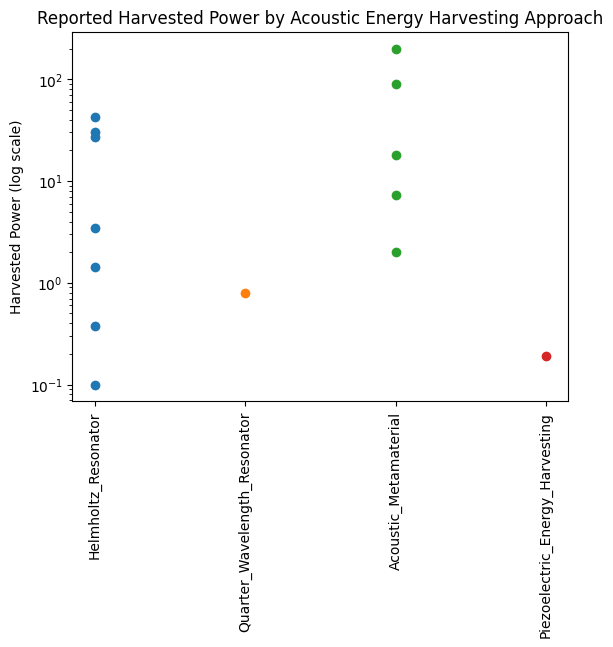

In [15]:
plt.figure()

for approach in df_abs["Approach"].unique():
    subset = df_abs[df_abs["Approach"] == approach]
    plt.scatter(
        [approach] * len(subset),
        subset["Power_Value"]
    )

plt.yscale("log")
plt.ylabel("Harvested Power (log scale)")
plt.xticks(rotation=90)
plt.title("Reported Harvested Power by Acoustic Energy Harvesting Approach")
plt.show()


Reported harvested power values from literature for different acoustic energy harvesting approaches, plotted on a logarithmic scale. Each point represents a reported experimental value under distinct excitation conditions. Due to variations in SPL, frequency range, device geometry, and reporting metrics, values are indicative rather than directly comparable.

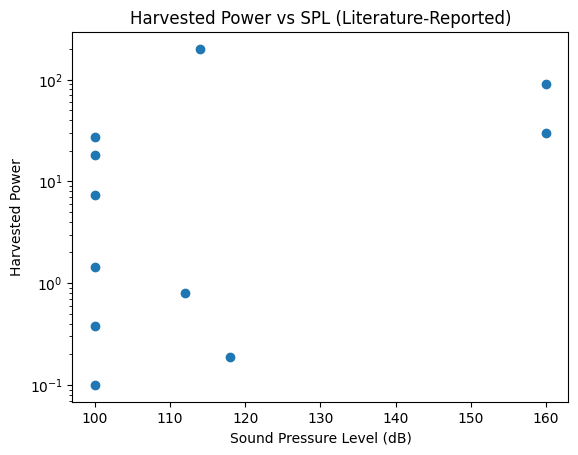

In [16]:
df_spl = df_abs.dropna(subset=["SPL_dB"])

plt.figure()
plt.scatter(df_spl["SPL_dB"], df_spl["Power_Value"])
plt.yscale("log")
plt.xlabel("Sound Pressure Level (dB)")
plt.ylabel("Harvested Power")
plt.title("Harvested Power vs SPL (Literature-Reported)")
plt.show()

x-axis: Sound Pressure Level (dB)

y-axis: Harvested power (log scale)

Each point = a literature-reported experimental result

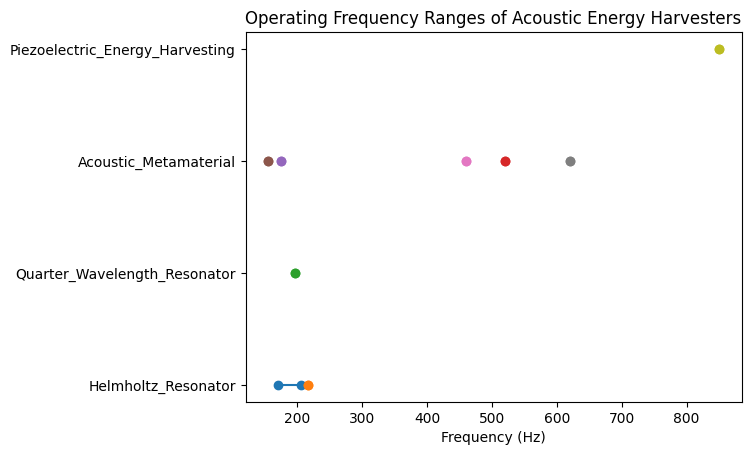

In [17]:
df_freq = df_abs.dropna(subset=["Frequency_Hz_Lower", "Frequency_Hz_Upper"])

plt.figure()
for i, row in df_freq.iterrows():
    plt.plot(
        [row["Frequency_Hz_Lower"], row["Frequency_Hz_Upper"]],
        [row["Approach"], row["Approach"]],
        marker="o"
    )

plt.xlabel("Frequency (Hz)")
plt.title("Operating Frequency Ranges of Acoustic Energy Harvesters")
plt.show()


Helmholtz resonators cluster tightly in the low-frequency band (~150–220 Hz)

Quarter-wavelength resonators sit slightly higher but still low-frequency (~200 Hz)

Acoustic metamaterials span a much wider frequency range (~150–650 Hz)

Piezoelectric energy harvesting (standalone) appears at high frequencies (~850 Hz)

Each point represents the characteristic operating frequency or resonance of a specific experimental configuration.